In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time

In [65]:
df = pd.read_csv('resale-flat-prices-2019.csv')
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2019-01,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years 01 month,270000.0
1,2019-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,56 years 04 months,295000.0
2,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,58 years 01 month,270000.0
3,2019-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,58 years,230000.0
4,2019-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,61 years,262500.0


In [66]:
summary = df.describe()
summary

,floor_area_sqm,lease_commence_date,resale_price
count,16242.000000,16242.000000,1.624200e+04
mean,97.271204,1994.190555,4.321391e+05
std,24.391180,13.044843,1.551223e+05
min,31.000000,1966.000000,1.600000e+05
25%,80.000000,1984.000000,3.200000e+05
50%,94.000000,1994.000000,4.000000e+05
75%,112.000000,2003.000000,5.100000e+05
max,192.000000,2016.000000,1.205000e+06


In [67]:
df = df.drop(['month', 'town', 'block', 'street_name', 'storey_range','remaining_lease'], axis=1)
df.head()

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,3 ROOM,68.0,New Generation,1981,270000.0
1,3 ROOM,73.0,New Generation,1976,295000.0
2,3 ROOM,67.0,New Generation,1978,270000.0
3,3 ROOM,67.0,New Generation,1978,230000.0
4,3 ROOM,68.0,New Generation,1981,262500.0


In [68]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM', '2 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [69]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [70]:
df['flat_type']= label_encoder.fit_transform(df['flat_type'])
df['flat_type'].unique()

array([2, 3, 4, 5, 0, 1, 6], dtype=int64)

In [71]:
df['flat_model'].unique() 

array(['New Generation', 'Improved', 'Model A', 'Standard', 'DBSS',
       'Simplified', 'Premium Apartment', 'Apartment', 'Maisonette',
       'Type S1', 'Type S2', 'Adjoined flat', 'Model A2', 'Terrace',
       'Premium Apartment Loft', 'Model A-Maisonette', 'Multi Generation',
       'Improved-Maisonette', 'Premium Maisonette'], dtype=object)

In [72]:
df['flat_model']= label_encoder.fit_transform(df['flat_model']) 
df['flat_model'].unique()

array([10,  3,  6, 15,  2, 14, 11,  1,  5, 17, 18,  0,  8, 16, 12,  7,  9,
        4, 13], dtype=int64)

In [73]:
df.head()

,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2,68.0,10,1981,270000.0
1,2,73.0,10,1976,295000.0
2,2,67.0,10,1978,270000.0
3,2,67.0,10,1978,230000.0
4,2,68.0,10,1981,262500.0


In [74]:
df_ohe = pd.get_dummies(df, columns=['flat_type', 'flat_model'], drop_first=True)
df_ohe

,floor_area_sqm,lease_commence_date,resale_price,flat_type_1,flat_type_2,flat_type_3,flat_type_4,flat_type_5,flat_type_6,flat_model_1,...,flat_model_9,flat_model_10,flat_model_11,flat_model_12,flat_model_13,flat_model_14,flat_model_15,flat_model_16,flat_model_17,flat_model_18
0,68.0,1981,270000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,73.0,1976,295000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,67.0,1978,270000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,67.0,1978,230000.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,68.0,1981,262500.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,146.0,1988,543888.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16238,164.0,1992,695888.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
16239,164.0,1992,745000.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
16240,146.0,1986,605000.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


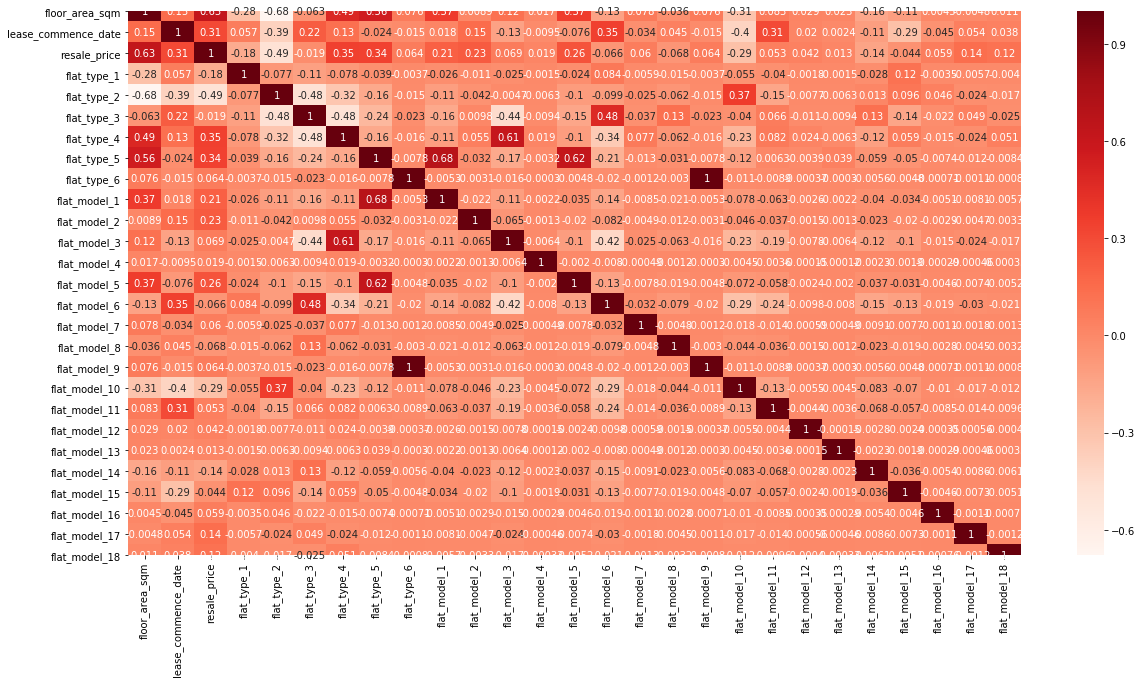

In [75]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df_ohe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [76]:
#Correlation with output variable
cor_target = abs(cor["resale_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

floor_area_sqm    0.631337
resale_price      1.000000
Name: resale_price, dtype: float64

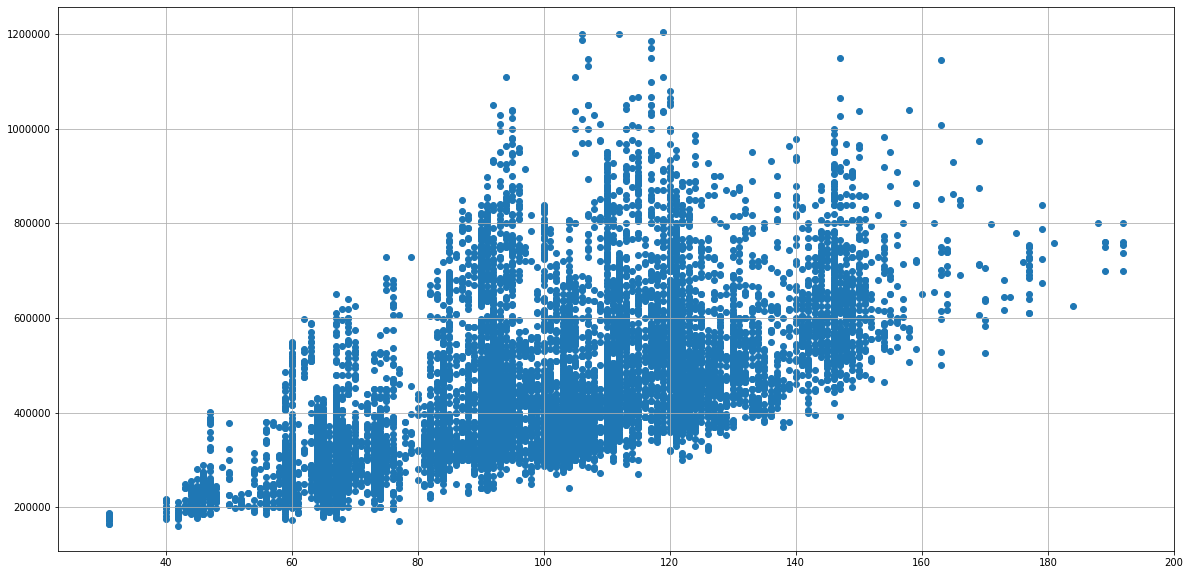

In [77]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax.scatter(df_ohe['floor_area_sqm'], df_ohe['resale_price'])
ax.grid()
plt.show()

In [78]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [79]:
X = df_ohe[['floor_area_sqm']]

y = df_ohe['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 42) 
X_train.head()

,floor_area_sqm
2820,84.0
15630,93.0
4469,92.0
12423,84.0
12776,62.0


In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 1)
(33, 1)
(16209,)
(33,)


In [81]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
start_time = time.time()
model = lModel.fit(X_train, y_train)
train_duration = time.time() - start_time
y_hat = lModel.predict(X_test)
print(y_hat)

[282551.34346452 406985.0178269  483250.81824255 483250.81824255
 406985.0178269  230369.48002224 527404.70269372 427054.9653047
 402971.02833134 338747.19640237 459166.88126919 463180.87076475
 338747.19640237 455152.89177363 459166.88126919 298607.30144677
 415012.99681802 531418.69218928 302621.29094233 483250.81824255
 415012.99681802 410999.00732246 643810.39806497 499306.77622479
 314663.25942901 423040.97580914 491278.79723367 527404.70269372
 310649.26993345 595642.52411825 370859.11236686 531418.69218928
 523390.71319816]


In [82]:
#time taken to train the model
train_duration

0.003388643264770508

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

9866128240.28974

In [84]:
r2_score(y_test, y_hat)

0.535227534458619

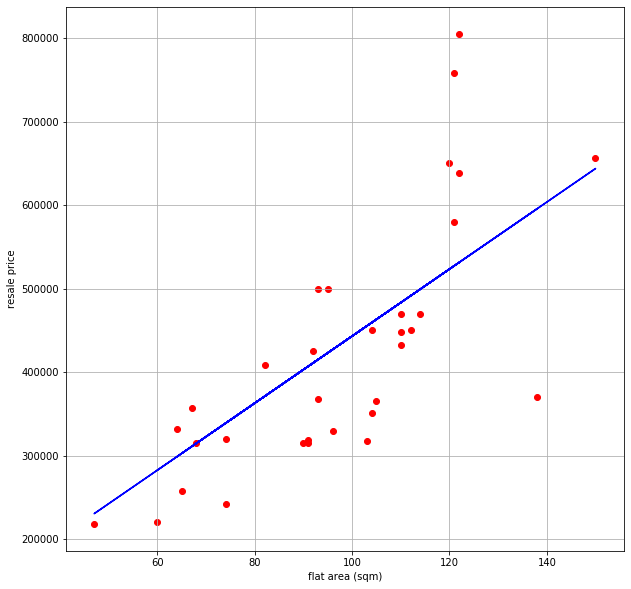

In [85]:
fig, ax = plt.subplots(figsize = (10,10))


ax.plot(X_test, y_hat, c = 'blue', label='Test data')
ax.scatter(X_test, y_test, c = 'red', label='Test points')
ax.set(xlabel='flat area (sqm)', ylabel='resale price')
ax.grid()
plt.show()

In [86]:
X = df_ohe[['floor_area_sqm', 'flat_type_1', 'flat_type_2', 'flat_type_3', 'flat_type_4', 'flat_type_5', 'flat_type_6']]

y = df_ohe['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 42) 
X_train.head()

,floor_area_sqm,flat_type_1,flat_type_2,flat_type_3,flat_type_4,flat_type_5,flat_type_6
2820,84.0,0,0,1,0,0,0
15630,93.0,0,0,1,0,0,0
4469,92.0,0,0,1,0,0,0
12423,84.0,0,0,1,0,0,0
12776,62.0,0,1,0,0,0,0


In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 7)
(33, 7)
(16209,)
(33,)


In [88]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)
y_hat = lModel.predict(X_test)
print(y_hat)

[288604.82083479 423039.56472555 516942.15728052 516942.15728052
 423039.56472555 232496.96348416 530823.5735629  429349.29939936
 421777.61779079 306272.07792145 439444.87487745 440706.82181221
 306272.07792145 438182.92794269 439444.87487745 293652.60857384
 425563.45859507 532085.52049766 294914.5555086  516942.15728052
 425563.45859507 424301.51166031 623629.96727086 521989.94501957
 298700.39631288 428087.35246459 519466.05115004 530823.5735629
 297438.44937812 552276.67145384 411682.0423127  532085.52049766
 529561.62662813]


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

9457387932.218063

In [90]:
r2_score(y_test, y_hat)

0.5544824271705182

In [91]:
X = df_ohe[['floor_area_sqm', 'flat_model_1', 'flat_model_2', 'flat_model_3', 'flat_model_4', 'flat_model_5', 'flat_model_6',
            'flat_model_7', 'flat_model_8', 'flat_model_9', 'flat_model_10', 'flat_model_11', 'flat_model_12', 'flat_model_13',
            'flat_model_14', 'flat_model_15', 'flat_model_16', 'flat_model_17', 'flat_model_18']]

y = df_ohe['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 42) 
X_train.head()

,floor_area_sqm,flat_model_1,flat_model_2,flat_model_3,flat_model_4,flat_model_5,flat_model_6,flat_model_7,flat_model_8,flat_model_9,flat_model_10,flat_model_11,flat_model_12,flat_model_13,flat_model_14,flat_model_15,flat_model_16,flat_model_17,flat_model_18
2820,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15630,93.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4469,92.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12423,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12776,62.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 19)
(33, 19)
(16209,)
(33,)


In [93]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)
y_hat = lModel.predict(X_test)
print(y_hat)

[296066.86409788 365316.68050973 477619.95367138 480975.77214977
 411569.92658689 251803.20776221 517561.63337755 383471.98946708
 407938.86479542 349841.8761319  458773.729876   462404.79166747
 349841.8761319  455142.66808453 458773.729876   275534.529528
 372578.80409267 521192.69516902 314222.17305523 477619.95367138
 418832.05016983 415616.65990331 666540.09388503 495500.01931565
 281802.25930592 426509.84527772 488237.89573271 517561.63337755
 324424.44359161 582229.83078598 375950.22351022 521192.69516902
 513930.57158608]


In [94]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

10337102193.095224

In [95]:
r2_score(y_test, y_hat)

0.5130409461719108

In [96]:
X = df_ohe[['floor_area_sqm', 'flat_type_1', 'flat_type_2', 'flat_type_3', 'flat_type_4', 'flat_type_5', 'flat_type_6',
           'flat_model_1', 'flat_model_2', 'flat_model_3', 'flat_model_4', 'flat_model_5', 'flat_model_6', 'flat_model_7',
           'flat_model_8', 'flat_model_9', 'flat_model_10', 'flat_model_11', 'flat_model_12', 'flat_model_13',
           'flat_model_14', 'flat_model_15', 'flat_model_16', 'flat_model_17', 'flat_model_18']]

y = df_ohe['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 42) 
X_train.head()

,floor_area_sqm,flat_type_1,flat_type_2,flat_type_3,flat_type_4,flat_type_5,flat_type_6,flat_model_1,flat_model_2,flat_model_3,...,flat_model_9,flat_model_10,flat_model_11,flat_model_12,flat_model_13,flat_model_14,flat_model_15,flat_model_16,flat_model_17,flat_model_18
2820,84.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15630,93.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4469,92.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12423,84.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12776,62.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 25)
(33, 25)
(16209,)
(33,)


In [98]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)
y_hat = lModel.predict(X_test)
print(y_hat)

[293730.06181678 392139.45424805 511825.99398614 520099.26214923
 441356.88483858 238757.41811435 512187.60608687 392303.82338475
 441324.01101125 327590.23888496 441784.24459399 441817.11842132
 327590.23888496 441751.37076665 441784.24459399 246904.27175585
 392205.20190273 512220.4799142  293894.43095347 511825.99398614
 441422.63249326 416263.08334357 659546.84147088 520230.75745859
 278175.5653304  416361.70482559 520165.00980391 512187.60608687
 327360.12209359 546146.40463706 407661.0769071  512220.4799142
 512154.73225953]


In [99]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

10792129027.476635

In [100]:
r2_score(y_test, y_hat)

0.49160559295611594

In [101]:
X = df[['floor_area_sqm', 'flat_type', 'flat_model']]

y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.002, random_state = 42) 
X_train.head()

,floor_area_sqm,flat_type,flat_model
2820,84.0,3,14
15630,93.0,3,11
4469,92.0,3,6
12423,84.0,3,14
12776,62.0,2,6


In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 3)
(33, 3)
(16209,)
(33,)


In [103]:
# instantiate a linear regression model
lModel = linear_model.LinearRegression()

# train the model to fit the training data, finding the coef and intercept
model = lModel.fit(X_train, y_train)
y_hat = lModel.predict(X_test)
print(y_hat)

[308684.26840927 410121.2058573  518530.02733588 505657.38858019
 416557.52523515 214489.38320449 532788.99164513 416602.5532706
 415261.25575249 322004.80163312 433409.02850972 434705.29799238
 322004.80163312 432112.75902706 433409.02850972 296169.46805083
 412713.74482262 534085.26112779 315165.61582257 518530.02733588
 419150.06420046 409808.3954955  639678.78935015 510842.46651083
 307790.86535931 413697.20394348 508249.92754551 532788.99164513
 312930.9152545  549998.33331695 409718.3394246  534085.26112779
 531492.72216247]


In [104]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_hat)

9140256481.698015

In [105]:
r2_score(y_test, y_hat)

0.5694218200680292